<a href="https://colab.research.google.com/github/sharinair14/ML-Projects/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

**Reading the dataset**

In [19]:
data=pd.read_csv('/content/heart.csv')

In [20]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [21]:
data.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


**Description of each features:**

age: age in years

sex: sex (1 = male; 0 = female)

cp: chest pain type
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic

trestbps: resting blood pressure (in mm Hg on admission to the hospital)

chol: serum cholestoral in mg/dl

fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg: resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach: maximum heart rate achieved

exang: exercise induced angina (1 = yes; 0 = no)

oldpeak = ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment
-- Value 1: upsloping
-- Value 2: flat
-- Value 3: downsloping

ca: number of major vessels (0-3) colored by flourosopy

thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

target: diagnosis of heart disease (angiographic disease status)
-- Value 0: < 50% diameter narrowing
-- Value 1: > 50% diameter narrowing

In [22]:
data.shape

(303, 14)

In [23]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [24]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

This dataset contains no missing values

In [25]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

From the above data, 165 people having heart disease and 138 people doesn't have heart disease.

**Visualizing the data**

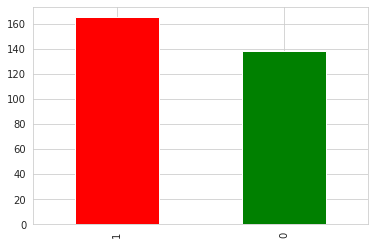

In [26]:
data['target'].value_counts().plot(kind='bar',color=['red','green'])

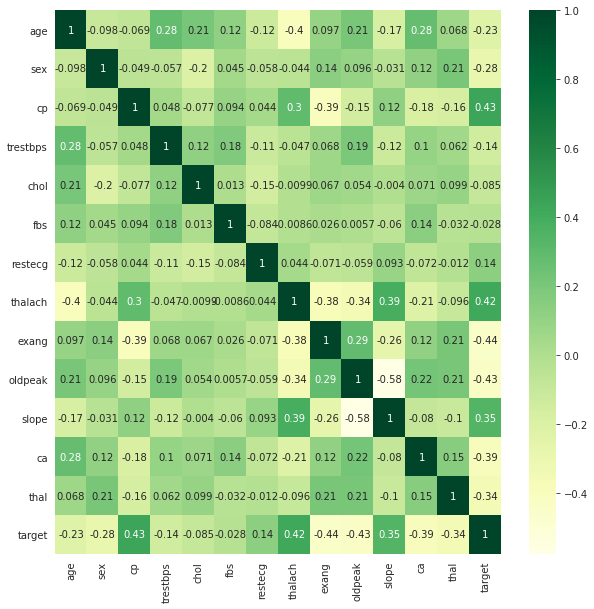

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,cmap='YlGn')

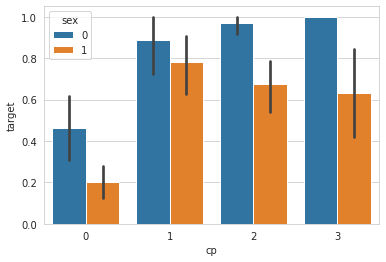

In [28]:
sns.barplot(x='cp',y='target',data=data,hue='sex')

From the above plot, it is clear that women tends to have heart disease compared to male.People who has chest pain value 3(cp=3) most likely to have heart disease.

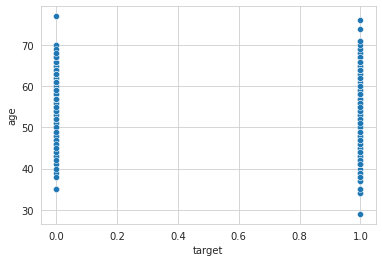

In [29]:
sns.scatterplot(x='target',y='age',data=data)

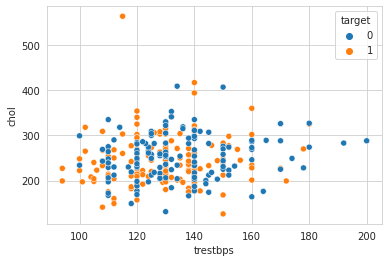

In [30]:
sns.scatterplot(x='trestbps',y='chol',data=data,hue='target')

In the above plot, there are some outliers like person who is heart patient and having high serum cholestoral & normal resting blood pressure.There is another case such that the person is having high resting blood sugar and normal cholestoral and he/she is not a heart patient.

So it is inferred that a person having low cholestoral less likely to have heart disease.



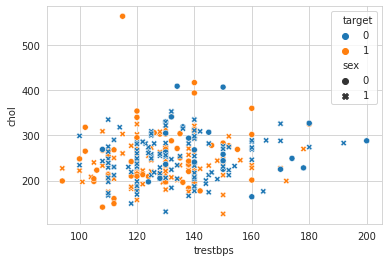

In [31]:
sns.scatterplot(x='trestbps',y='chol',data=data,hue='target',style='sex')

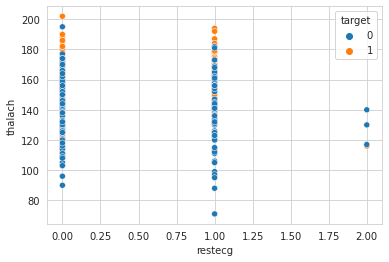

In [32]:
sns.scatterplot(x='restecg',y='thalach',data=data,hue='target')

In [33]:
categorical_val = []
continous_val = []
for column in data.columns:
  if len(data[column].unique()) <= 4:
    categorical_val.append(column)
  else:
   continous_val.append(column)

In [34]:
continous_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

In [35]:
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'target']

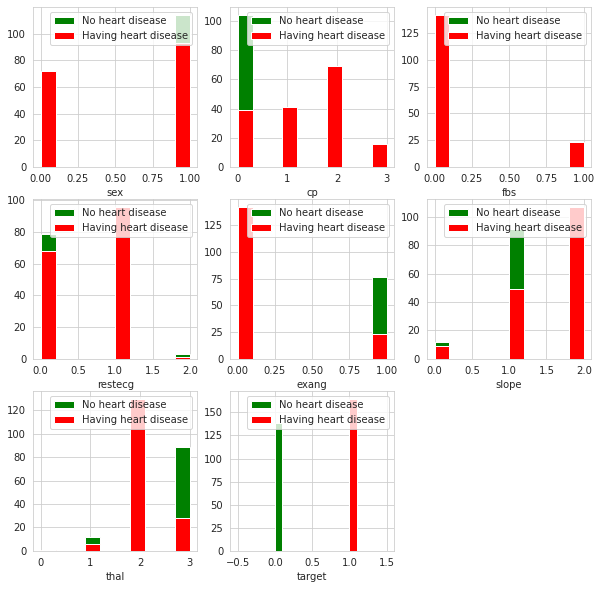

In [42]:
plt.figure(figsize=(10,10))
for i,column in enumerate(categorical_val,1):
  plt.subplot(3,3,i)
  data[data['target']==0][column].hist(bins=10,color='green',label='No heart disease')
  data[data['target']==1][column].hist(bins=10,color='red',label='Having heart disease')
  plt.xlabel(column)
  plt.legend()

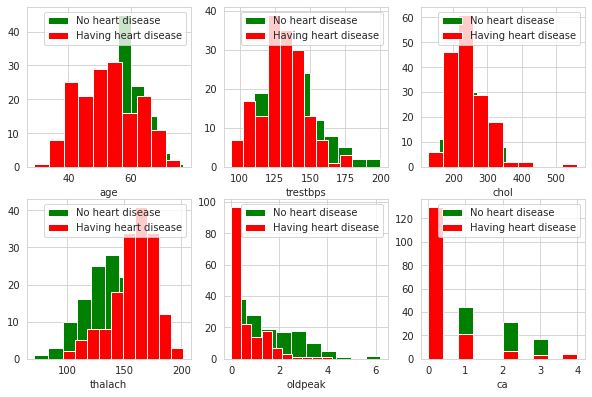

In [43]:
plt.figure(figsize=(10,10))
for i,column in enumerate(continous_val,1):
  plt.subplot(3,3,i)
  data[data['target']==0][column].hist(bins=10,color='green',label='No heart disease')
  data[data['target']==1][column].hist(bins=10,color='red',label='Having heart disease')
  plt.xlabel(column)
  plt.legend()

In [44]:
x=data.drop('target',axis=1)
y=data['target']

**Splitting into training and test data**

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [47]:
x_test.shape

(61, 13)

In [49]:
x_train.shape

(242, 13)

**Build the model**

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
lr=LogisticRegression(random_state=101)
lr.fit(x_train,y_train)
ypred=lr.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**Evaluating the model**

In [54]:
from sklearn.metrics import confusion_matrix,recall_score,precision_score,accuracy_score

In [55]:
print('Accuracy score of training set is',lr.score(x_train,y_train))

Accuracy score of training set is 0.8429752066115702


In [56]:
print('Accuracy score of test set is',accuracy_score(y_test,ypred))
print('Precision score is',precision_score(y_test,ypred))
print('Recall score is',recall_score(y_test,ypred))
print('Confusion Matrix is',confusion_matrix(y_test,ypred))

Accuracy score of test set is 0.8688524590163934
Precision score is 0.8055555555555556
Recall score is 0.9666666666666667
Confusion Matrix is [[24  7]
 [ 1 29]]
